In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

In [3]:
import pandas as pd
import geopandas as gpd

In [4]:
import povertymapping.dhs_data_proc as pdhs

In [5]:
dhs_config = dict(
        save_path="../data/outputs/dhs_kh",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="kh",
        dhs_folder="dhs_kh",
        dhs_zip_folder="KHHR73DT",
        dhs_file="KHHR73FL.DTA",
        country="kh",
        dhs_geo_zip_folder="KHGE71FL",
        dhs_geo_file="KHGE71FL.shp",
    )

In [6]:
!rm -rf {dhs_config['save_path']}

In [7]:
%%time
pdhs.process_dhs_data(dhs_config)

Data Dimensions: (15825, 1873)
Data Dimensions: (611, 1)
CPU times: user 45.2 s, sys: 1.09 s, total: 46.3 s
Wall time: 46.3 s


/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [8]:
dhs_ph_base = pd.read_csv(Path(dhs_config['save_path'])/'KHHR73DT_base.csv')

In [9]:
len(dhs_ph_base)

15825

In [10]:
%%time
gdf = gpd.read_file(Path(dhs_config['save_path'])/'KHHR73DT_KHGE71FL_by_cluster.geojson')

CPU times: user 76.9 ms, sys: 386 µs, total: 77.3 ms
Wall time: 75.6 ms


In [11]:
gdf.columns

Index(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA', 'LATNUM',
       'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype='object')

In [12]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
gdf.head()

,DHSCLUST,Wealth Index,DHSID,DHSCC,DHSYEAR,CCFIPS,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,...,DHSREGCO,DHSREGNA,SOURCE,URBAN_RURA,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,DATUM,geometry
0,1,-7443.192308,KH201400000001,KH,2014.0,CB,NULL,NULL,NULL,NULL,...,1.0,banteay mean chey,CEN,R,13.518676,103.028394,9999.0,11.0,WGS84,POINT (103.02839 13.51868)
1,2,2622.678571,KH201400000002,KH,2014.0,CB,NULL,NULL,NULL,NULL,...,1.0,banteay mean chey,CEN,R,13.398398,102.953852,9999.0,23.0,WGS84,POINT (102.95385 13.39840)
2,3,22167.920000,KH201400000003,KH,2014.0,CB,NULL,NULL,NULL,NULL,...,1.0,banteay mean chey,CEN,R,13.503451,102.996001,9999.0,13.0,WGS84,POINT (102.99600 13.50345)
3,4,32241.826087,KH201400000004,KH,2014.0,CB,NULL,NULL,NULL,NULL,...,1.0,banteay mean chey,CEN,U,13.549399,103.071416,9999.0,14.0,WGS84,POINT (103.07142 13.54940)
4,5,154111.500000,KH201400000005,KH,2014.0,CB,NULL,NULL,NULL,NULL,...,1.0,banteay mean chey,CEN,U,13.538865,103.028993,9999.0,15.0,WGS84,POINT (103.02899 13.53887)


In [14]:
import matplotlib.pyplot as plt

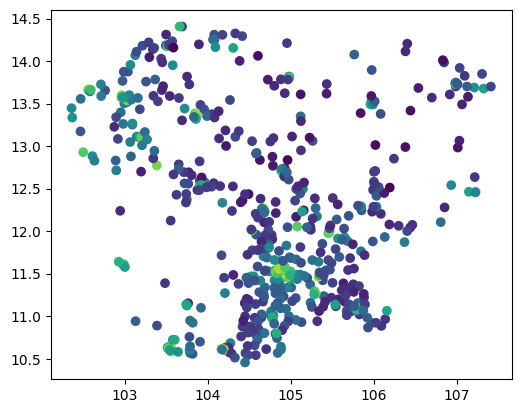

In [15]:
ax = plt.axes()
ax = gdf.plot(column='Wealth Index',ax=ax)